In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [2]:
df = pd.read_csv('./Train.csv')
data = df.copy()

In [3]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
data.describe(include='all')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451,29451.000000,29451.000000,29451.000000,29451,2.945100e+04,29451.000000,29451.000000,29451,29451.000000,29451.000000,29451.000000
unique,3,NaN,NaN,NaN,2,NaN,NaN,NaN,6899,NaN,NaN,NaN
top,Dealer,NaN,NaN,NaN,BHK,NaN,NaN,NaN,"Zirakpur,Chandigarh",NaN,NaN,NaN
freq,18291,NaN,NaN,NaN,29427,NaN,NaN,NaN,509,NaN,NaN,NaN
mean,NaN,0.179756,0.317918,2.392279,NaN,1.980217e+04,0.820244,0.929578,NaN,21.300255,76.837695,142.898746
std,NaN,0.383991,0.465675,0.879091,NaN,1.901335e+06,0.383991,0.255861,NaN,6.205306,10.557747,656.880713
min,NaN,0.000000,0.000000,1.000000,NaN,3.000000e+00,0.000000,0.000000,NaN,-37.713008,-121.761248,0.250000
25%,NaN,0.000000,0.000000,2.000000,NaN,9.000211e+02,1.000000,1.000000,NaN,18.452663,73.798100,38.000000
50%,NaN,0.000000,0.000000,2.000000,NaN,1.175057e+03,1.000000,1.000000,NaN,20.750000,77.324137,62.000000
75%,NaN,0.000000,1.000000,3.000000,NaN,1.550688e+03,1.000000,1.000000,NaN,26.900926,77.828740,100.000000


* Chances of outliers in BHK_NO , SQUARE_FT and TARGET(PRICE_IN_LACS)

In [5]:
data[data.duplicated()]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9


* Total no of duplicated rows = 401
* Remove Them

In [6]:
data = data[~data.duplicated()]

In [7]:
data.shape

(29050, 12)

In [8]:
sns.set(rc={'figure.figsize':(16,16)})

# Categorical Values

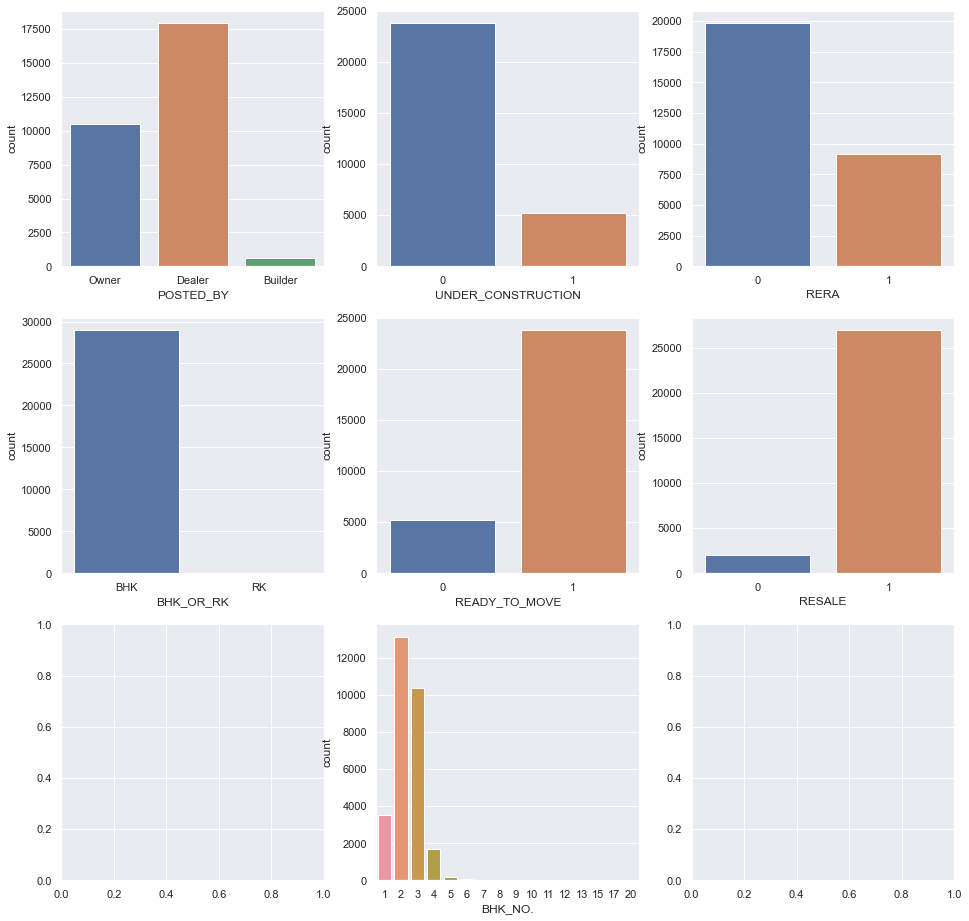

In [9]:
fig,ax = plt.subplots(3,3)

sns.countplot(data=data,x='POSTED_BY',ax=ax[0,0])
sns.countplot(data=data,x='UNDER_CONSTRUCTION',ax=ax[0,1])
sns.countplot(data=data,x='RERA',ax=ax[0,2])
sns.countplot(data=data,x='BHK_OR_RK',ax=ax[1,0])
sns.countplot(data=data,x='READY_TO_MOVE',ax=ax[1,1])
sns.countplot(data=data,x='RESALE',ax=ax[1,2])
sns.countplot(data=data,x='BHK_NO.',ax=ax[2,1])


In [10]:
data['BHK_NO.'].value_counts()

2     13164
3     10365
1      3540
4      1698
5       189
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

In [11]:
from scipy.stats import norm

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


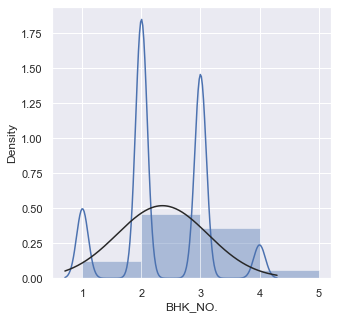

In [12]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data[data['BHK_NO.']<=4]['BHK_NO.'],bins=[1,2,3,4,5],fit=norm)

In [13]:
data[data['BHK_NO.']>4].shape[0]*100/data.shape[0]

0.9741824440619621

* Percentage of FLAT > 4 BHK = 0.97%
* Select only House with upto 4BHK
* Or Replace them with rare

In [14]:
#data = data[data['BHK_NO.']<=4]
data['BHK_NO.'] = data['BHK_NO.'].map(lambda x: x if x <= 4 else 5)

In [15]:
data['BHK_NO.'].value_counts()

2    13164
3    10365
1     3540
4     1698
5      283
Name: BHK_NO., dtype: int64

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


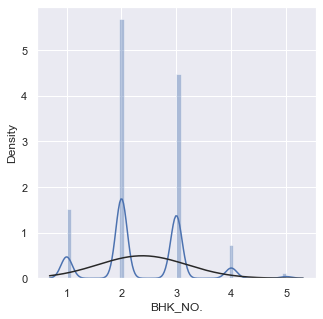

In [16]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data['BHK_NO.'],fit=norm)

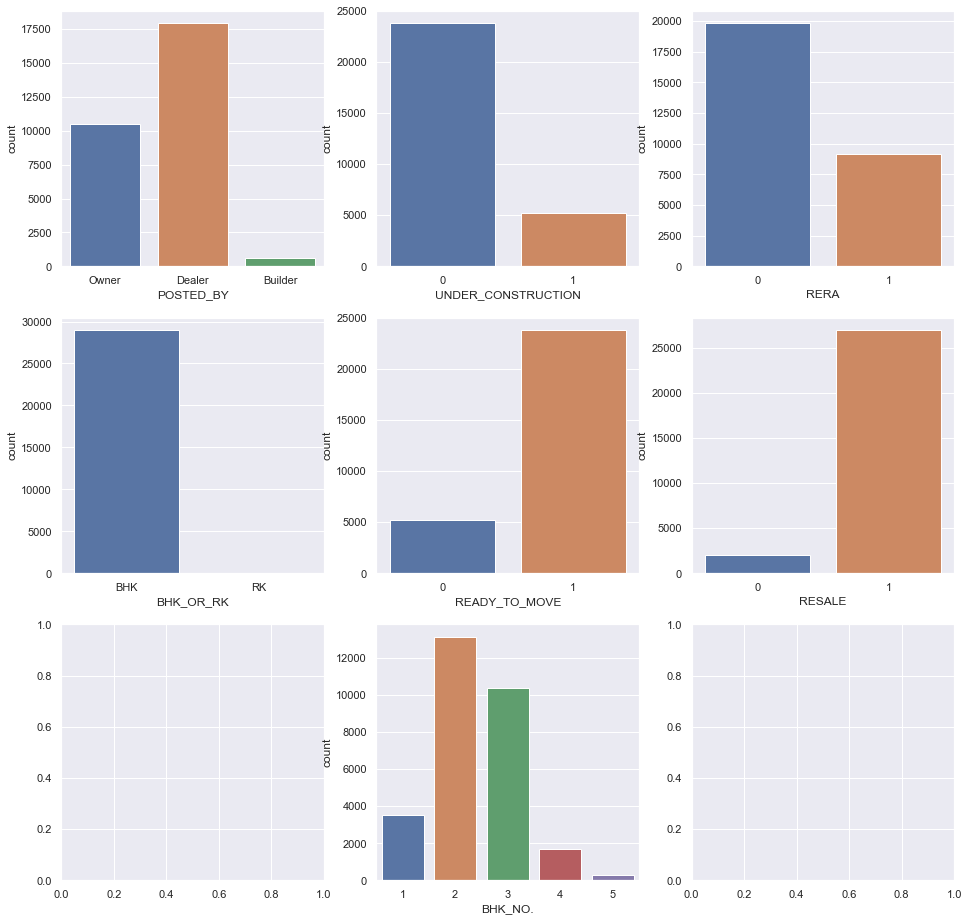

In [17]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(3,3)

sns.countplot(data=data,x='POSTED_BY',ax=ax[0,0])
sns.countplot(data=data,x='UNDER_CONSTRUCTION',ax=ax[0,1])
sns.countplot(data=data,x='RERA',ax=ax[0,2])
sns.countplot(data=data,x='BHK_OR_RK',ax=ax[1,0])
sns.countplot(data=data,x='READY_TO_MOVE',ax=ax[1,1])
sns.countplot(data=data,x='RESALE',ax=ax[1,2])
sns.countplot(data=data,x='BHK_NO.',ax=ax[2,1])


## Numerical Parameter

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

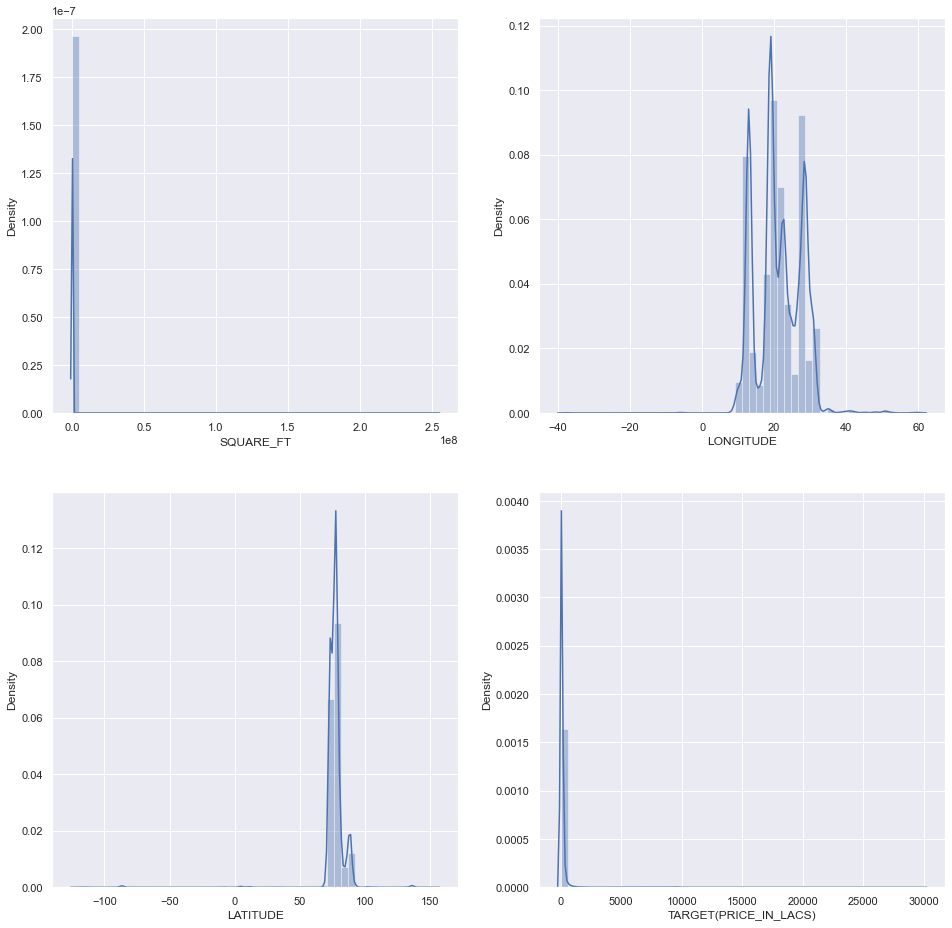

In [18]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(2,2)

sns.distplot(data['SQUARE_FT'],ax=ax[0,0])
sns.distplot(data['LONGITUDE'],ax=ax[0,1])
sns.distplot(data['LATITUDE'],ax=ax[1,0])
sns.distplot(data['TARGET(PRICE_IN_LACS)'],ax=ax[1,1])


G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  

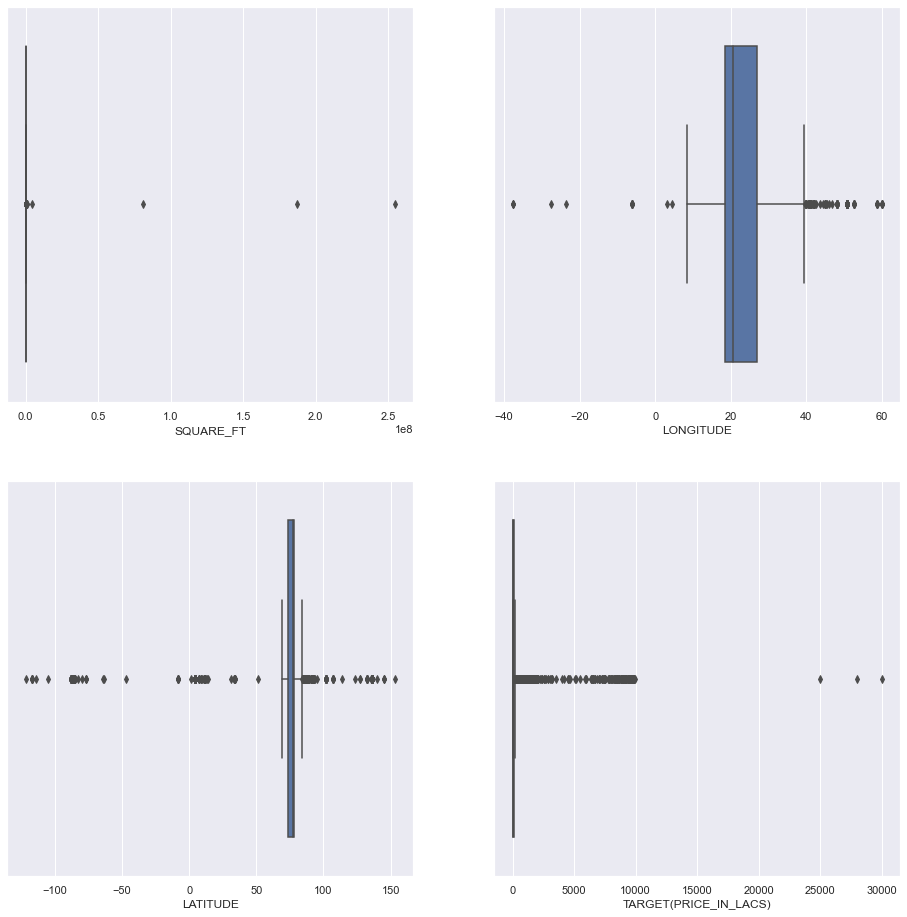

In [19]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(2,2)

sns.boxplot(data['SQUARE_FT'],ax=ax[0,0],orient='v')
sns.boxplot(data['LONGITUDE'],ax=ax[0,1],orient='v')
sns.boxplot(data['LATITUDE'],ax=ax[1,0],orient='v')
sns.boxplot(data['TARGET(PRICE_IN_LACS)'],ax=ax[1,1],orient='v')


### SQUARE_FT

In [25]:
q_1 = data['SQUARE_FT'].quantile(0.25)
q_3 = data['SQUARE_FT'].quantile(0.75)
IQR = q_3-q_1
IQR

650.1691089999999

In [26]:
mask = (data['SQUARE_FT'] < (q_1 - 1.5*IQR)) | (data['SQUARE_FT'] > (q_3 + 1.5*IQR))

In [27]:
d1 = data.copy()
print('Percent of Outlier')
d1[mask].shape[0]*100/d1.shape[0]

Percent of Outlier


5.549053356282272

In [28]:
d1[mask]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
40,Dealer,1,1,1,BHK,40606.195680,0,0,"Kanjur Marg (East),Lalitpur",24.690280,78.418890,9110.0
57,Owner,0,1,4,BHK,5200.945626,1,1,"Sector-76 Noida,Noida",28.567633,77.383124,110.0
68,Owner,0,0,2,BHK,5000.000000,1,1,"Malviya Nagar,Jaipur",26.850391,75.814198,85.0
92,Owner,0,0,3,BHK,2738.225630,1,1,"Basapura,Bangalore",12.863421,77.652405,150.0
117,Dealer,0,0,4,BHK,2750.929368,1,1,"Sikandra,Agra",27.216013,77.950834,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29396,Dealer,0,0,5,BHK,4078.014184,1,1,"Manpada,Lalitpur",24.690280,78.418890,920.0
29409,Dealer,0,1,4,BHK,5399.568035,1,1,"Vesu,Surat",21.143354,72.770931,400.0
29411,Dealer,0,0,4,BHK,2843.973718,1,1,"Pashan,Pune",18.544200,73.794800,290.0
29415,Owner,0,0,4,BHK,3650.240584,1,1,"Whitefield,Bangalore",12.995893,77.761394,220.0


In [29]:
print('Skew')
d1['SQUARE_FT'].skew()

Skew


115.81290137888708

In [ ]:
d1[~mask].groupby(['BHK_NO.'])['SQUARE_FT'].describe()

In [ ]:
d1[~mask].groupby(['BHK_NO.'])['SQUARE_FT'].quantile(0.01)

* Permforming log transformation
Cutt off for <br>
1 bhk - upper -> 900  lower -> 250 <br>
2 bhk - upper ->  1500     lower - > 500<br>
3 bhk - upper ->  2000     lower - > 773<br>
4 bhk - uppper ->      lower - > 900<br>
5 bhk - upper ->       lower - > 260<br>

In [ ]:
def transform_bhk(bhk,sqft):
    if bhk == 1:
        if sqft < 250:
            return 250
        if sqft > 900:
            return 900
        else:
            return sqft
    if bhk == 2:
        if sqft < 500:
            return 500
        if sqft > 1500:
            return 1500
        else:
            return sqft
    if bhk == 3:
        if sqft < 773:
            return 773
        if sqft > 2000:
            return 2000
        else:
            return sqft
    if bhk == 4:
        if sqft < 900:
            return 900
        else:
            return sqft
    if bhk == 5:
        if sqft < 260:
            return 260
        else:
            return sqft
    

In [ ]:
d1['SQUARE_FT'] = df.apply(lambda x: transform_bhk(x['BHK_NO.'],x['SQUARE_FT']),axis=1)

In [ ]:
d1['SQUARE_FT'] = np.log(d1['SQUARE_FT'] )


In [30]:
d1['SQUARE_FT'].skew()

115.81290137888708

In [31]:
q_1 = d1['SQUARE_FT'].quantile(0.25)
q_3 = d1['SQUARE_FT'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR


IQR for Longitude


650.1691089999999

In [32]:
q_min = d1['SQUARE_FT'].quantile(0.01)
q_max = d1['SQUARE_FT'].quantile(0.99)
q_min,q_max

(375.00310395400004, 5399.796810799999)

In [33]:
print('Percent of Outlier')
d1[(d1['SQUARE_FT'] < q_max) & (d1['SQUARE_FT'] > q_min)].shape[0]*100/d1.shape[0]

Percent of Outlier


97.99655765920826

In [36]:
d2 = d1.copy()
print('Percent of Outlier')
d2[mask].shape[0]*100/d2.shape[0]

Percent of Outlier


5.549053356282272

In [37]:
d2[mask]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
40,Dealer,1,1,1,BHK,40606.195680,0,0,"Kanjur Marg (East),Lalitpur",24.690280,78.418890,9110.0
57,Owner,0,1,4,BHK,5200.945626,1,1,"Sector-76 Noida,Noida",28.567633,77.383124,110.0
68,Owner,0,0,2,BHK,5000.000000,1,1,"Malviya Nagar,Jaipur",26.850391,75.814198,85.0
92,Owner,0,0,3,BHK,2738.225630,1,1,"Basapura,Bangalore",12.863421,77.652405,150.0
117,Dealer,0,0,4,BHK,2750.929368,1,1,"Sikandra,Agra",27.216013,77.950834,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29396,Dealer,0,0,5,BHK,4078.014184,1,1,"Manpada,Lalitpur",24.690280,78.418890,920.0
29409,Dealer,0,1,4,BHK,5399.568035,1,1,"Vesu,Surat",21.143354,72.770931,400.0
29411,Dealer,0,0,4,BHK,2843.973718,1,1,"Pashan,Pune",18.544200,73.794800,290.0
29415,Owner,0,0,4,BHK,3650.240584,1,1,"Whitefield,Bangalore",12.995893,77.761394,220.0


In [ ]:
d1[(d1['SQUARE_FT'] < q_min) | (d1['SQUARE_FT'] > q_max)].shape[0]*100/d1.shape[0]

In [38]:
d1 = d1[~mask]

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


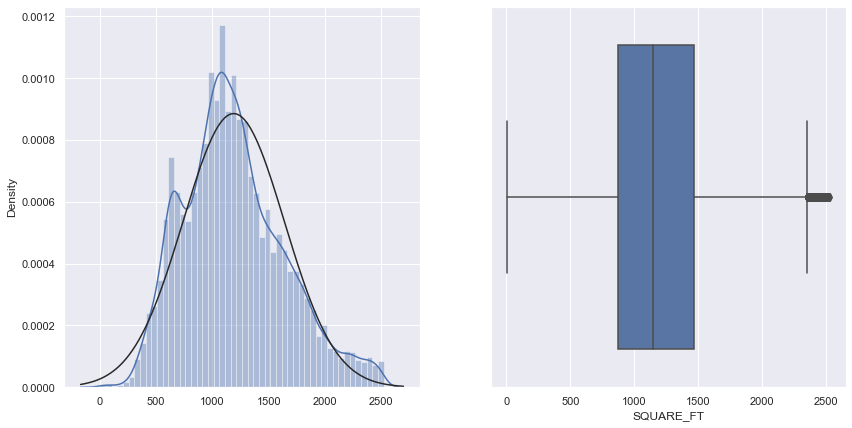

In [43]:
#sns.set(rc={'figure.figsize':(12,7)})
fig,ax = plt.subplots(1,2,figsize=(14,7))
sns.distplot(d1[['SQUARE_FT']],fit=norm,ax=ax[0])
sns.boxplot(d1['SQUARE_FT'],orient='v',ax=ax[1])

### LONGITUDE

In [44]:
q_1 = d1['LONGITUDE'].quantile(0.25)
q_3 = d1['LONGITUDE'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR


IQR for Longitude


8.403884499999997

In [46]:
d2 = d1.copy()
print('Percent of Outlier')
mask = (d2['LONGITUDE'] < (q_1 - 1.5*IQR)) | (d2['LONGITUDE'] > (q_3 + 1.5*IQR))
d2[mask].shape[0]*100/d2.shape[0]

Percent of Outlier


0.5065966907208981

* We can remove it

In [47]:
print('Skew')
d2['LONGITUDE'].skew()

Skew


0.18311011551124542

In [ ]:
q_min = d2['LONGITUDE'].quantile(0.01)
q_max = d2['LONGITUDE'].quantile(0.99)
q_min,q_max

In [48]:
d2 = d2[~mask]

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


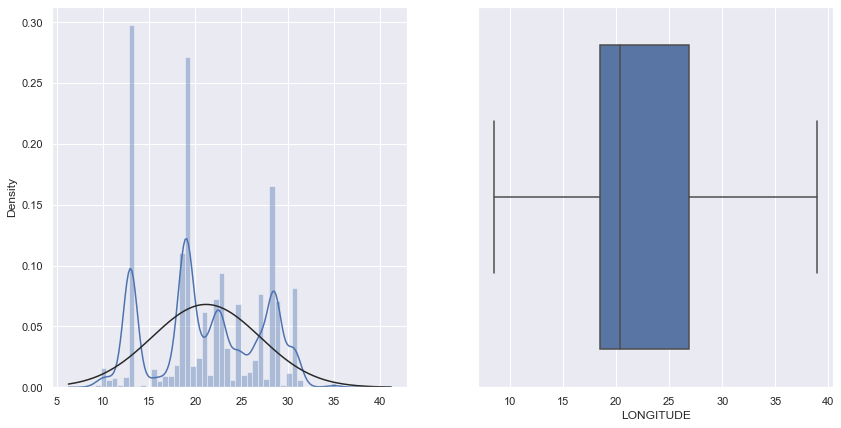

In [49]:
#sns.set(rc={'figure.figsize':(12,7)})
fig,ax = plt.subplots(1,2,figsize=(14,7))
sns.distplot(d2[['LONGITUDE']],fit=norm,ax=ax[0])
sns.boxplot(d2['LONGITUDE'],orient='v',ax=ax[1])

### LATITUDE

In [50]:
q_1 = d2['LATITUDE'].quantile(0.25)
q_3 = d2['LATITUDE'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR


IQR for Longitude


4.279856999999993

In [51]:
d3 = d2.copy()
d3 = d3[(d3['LATITUDE'] >= -90) & (d3['LATITUDE'] <= 90)]
print('Percent of Outlier')
d3[(d3['LATITUDE'] < (q_1 - 1.5*IQR)) | (d3['LATITUDE'] > (q_3 + 1.5*IQR))].shape[0]*100/d3.shape[0]

Percent of Outlier


9.20625553260549

* Removing invalid values as, it can be between -90 to +90

In [52]:
d3['LATITUDE'] = np.log(d3['LATITUDE'])

G:\Installed\envs\tensorflowenv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
print('Skew')
d3['LATITUDE'] .skew()

Skew


-2.0181612806919165

In [54]:
q_1 = d3['LATITUDE'].quantile(0.25)
q_3 = d3['LATITUDE'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR

print('Percent of Outlier')
d3[(d3['LATITUDE'] < (q_1 - 1.5*IQR)) | (d3['LATITUDE'] > (q_3 + 1.5*IQR))].shape[0]*100/d3.shape[0]

IQR for Longitude
Percent of Outlier


9.14355267040425

In [55]:
q_min = d3['LATITUDE'].quantile(0.01)
q_max = d3['LATITUDE'].quantile(0.99)
q_min,q_max

(4.283818121255579, 4.482437420605795)

In [56]:
d3[(d3['LATITUDE'] >= q_min) & (d3['LATITUDE'] <= q_max)].shape[0]*100/d3.shape[0]

97.98982000590145

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


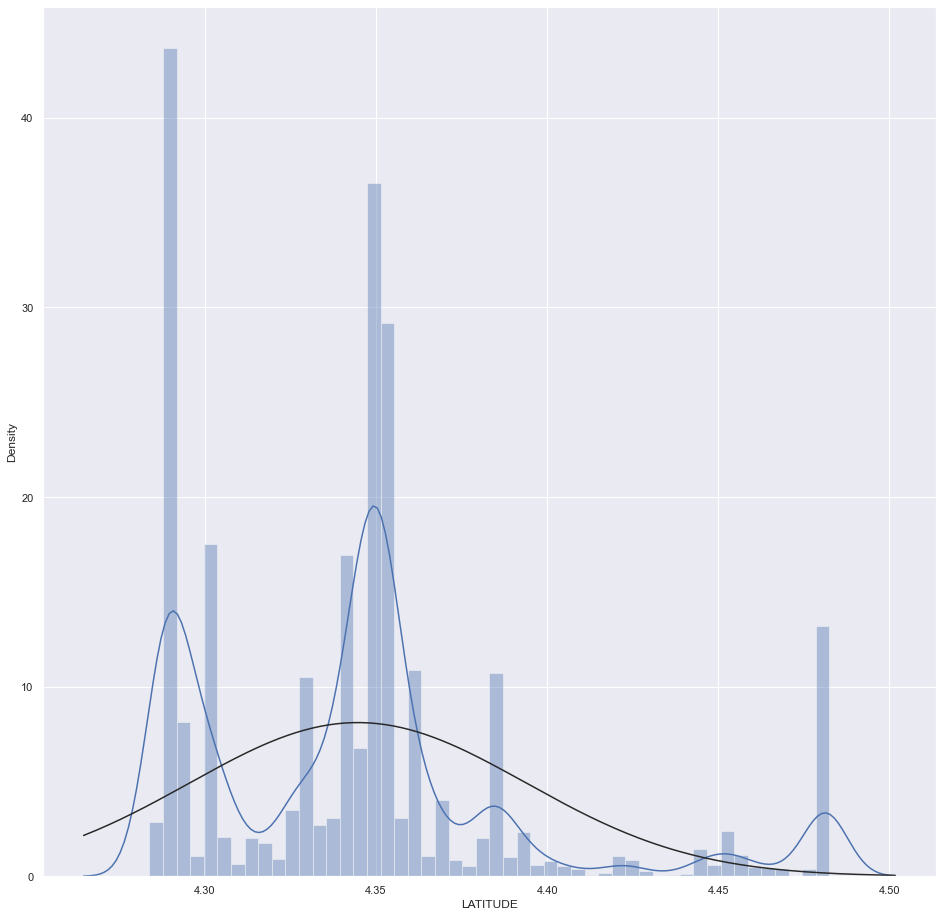

In [57]:
sns.distplot(d3[(d3['LATITUDE'] >= q_min) & (d3['LATITUDE'] < q_max)]['LATITUDE'],fit=norm)

In [58]:
d3 = d3[(d3['LATITUDE'] >= q_min) & (d3['LATITUDE'] < q_max)]
#d3 = d3[(d3['LATITUDE'] >= (q_1 - 1.5*IQR)) & (d3['LATITUDE'] <= (q_3 + 1.5*IQR))]

In [59]:
d3['LATITUDE'].skew()

1.1894803192179868

### TARGET(PRICE_IN_LACS)

In [60]:
df['TARGET(PRICE_IN_LACS)'].skew()

17.58333227553508

In [61]:
q_1 = d3['TARGET(PRICE_IN_LACS)'].quantile(0.25)
q_3 = d3['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR = q_3-q_1
print('IQR for TARGET(PRICE_IN_LACS)')
IQR


IQR for TARGET(PRICE_IN_LACS)


60.0

In [63]:
d4 = d3.copy()
print('Percent of Outlier')
mask = (d4['TARGET(PRICE_IN_LACS)'] < (q_1 - 1.5*IQR)) | (d4['TARGET(PRICE_IN_LACS)'] > (q_3 + 1.5*IQR))
d4[mask].shape[0]*100/d4.shape[0]

Percent of Outlier


7.769149577804584

In [64]:
d4[mask].sort_values(by='TARGET(PRICE_IN_LACS)')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1865,Dealer,0,0,2,BHK,1007.583391,1,1,"Swastik Park,Lalitpur",19.054325,4.288880,190.0
3199,Dealer,0,1,3,BHK,1654.043702,1,1,"Manpada,Mumbai",19.239813,4.289949,190.0
21292,Dealer,1,1,4,BHK,1408.033200,0,1,"Thane West,Lalitpur",19.180000,4.289957,190.0
17687,Dealer,0,0,3,BHK,1725.077175,1,1,"Kalyani Nagar,Pune",18.548100,4.302706,190.0
17678,Dealer,0,1,2,BHK,950.000000,1,1,"Powai,Maharashtra",19.120000,4.289226,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14567,Dealer,0,0,3,BHK,2500.000000,1,1,"Malabar Hill,Maharashtra",18.951632,4.287697,2050.0
4930,Dealer,0,0,3,BHK,2100.000000,1,1,"Malabar Hill,Lalitpur",18.951632,4.287697,2100.0
14908,Dealer,0,0,3,BHK,2500.000000,1,1,"Breach Candy,Lalitpur",18.972317,4.287803,2550.0
6451,Owner,0,0,2,BHK,900.000000,1,1,"Atlas More,Kolkata",22.541110,4.481168,2700.0


In [65]:
d4['TARGET(PRICE_IN_LACS)'] = np.log(d4['TARGET(PRICE_IN_LACS)'])
print('Skew')
d4['TARGET(PRICE_IN_LACS)'].skew()

Skew


0.3547053687182201

In [66]:
q_1 = d4['TARGET(PRICE_IN_LACS)'].quantile(0.25)
q_3 = d4['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR


IQR for Longitude


0.9637930658591585

In [69]:
print('Percent of Outlier')
mask = (d4['TARGET(PRICE_IN_LACS)'] < (q_1 - 1.5*IQR)) | (d4['TARGET(PRICE_IN_LACS)'] > (q_3 + 1.5*IQR))
d4[mask].shape[0]*100/d4.shape[0]

Percent of Outlier


1.7113992762364294

In [70]:
q_min = d4['TARGET(PRICE_IN_LACS)'].quantile(0.01)
q_max = d4['TARGET(PRICE_IN_LACS)'].quantile(0.99)
q_min,q_max

(2.4932054526026954, 6.173786103901937)

In [72]:

100-d4[(d4['TARGET(PRICE_IN_LACS)'] >= q_min) & (d4['TARGET(PRICE_IN_LACS)'] <= q_max)].shape[0]*100/d4.shape[0]

1.9941194209891506

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


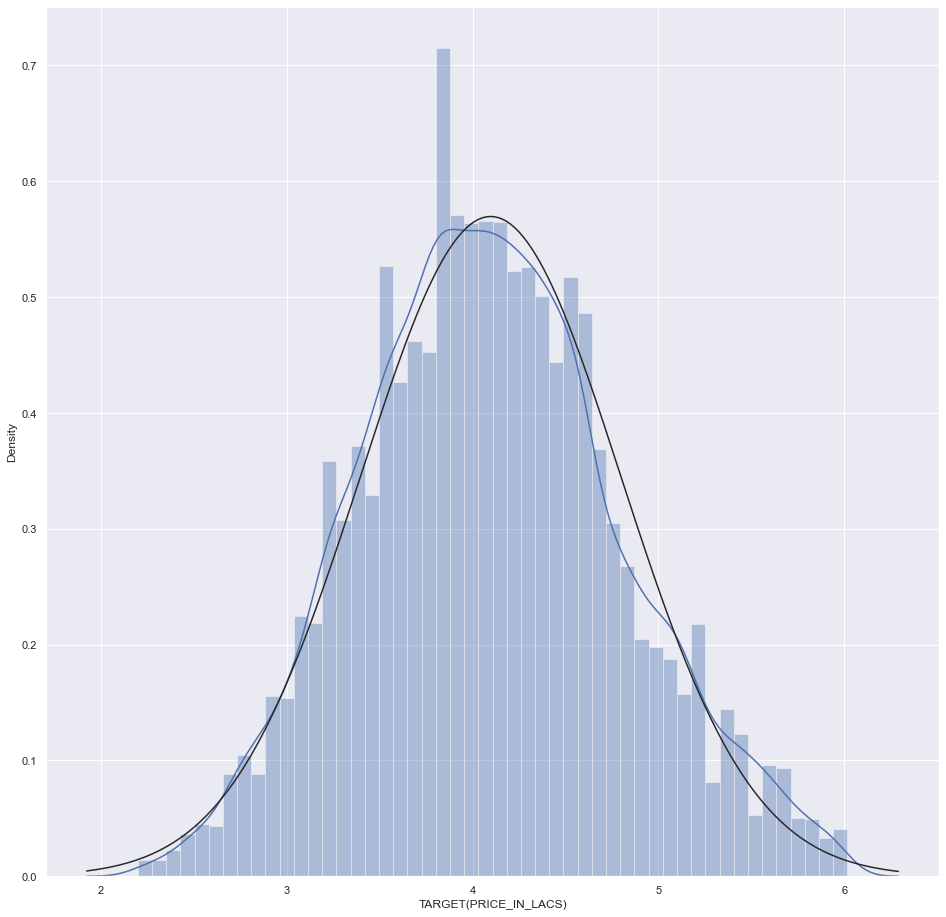

In [73]:
#d4 = d4[(d4['TARGET(PRICE_IN_LACS)'] >= q_min) & (d4['TARGET(PRICE_IN_LACS)'] <= q_max)]
d4 = d4[~mask] 
sns.distplot(d4['TARGET(PRICE_IN_LACS)'],fit=norm)

In [74]:
d4['TARGET(PRICE_IN_LACS)'].skew()

0.17935720842606817

### Final Results

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

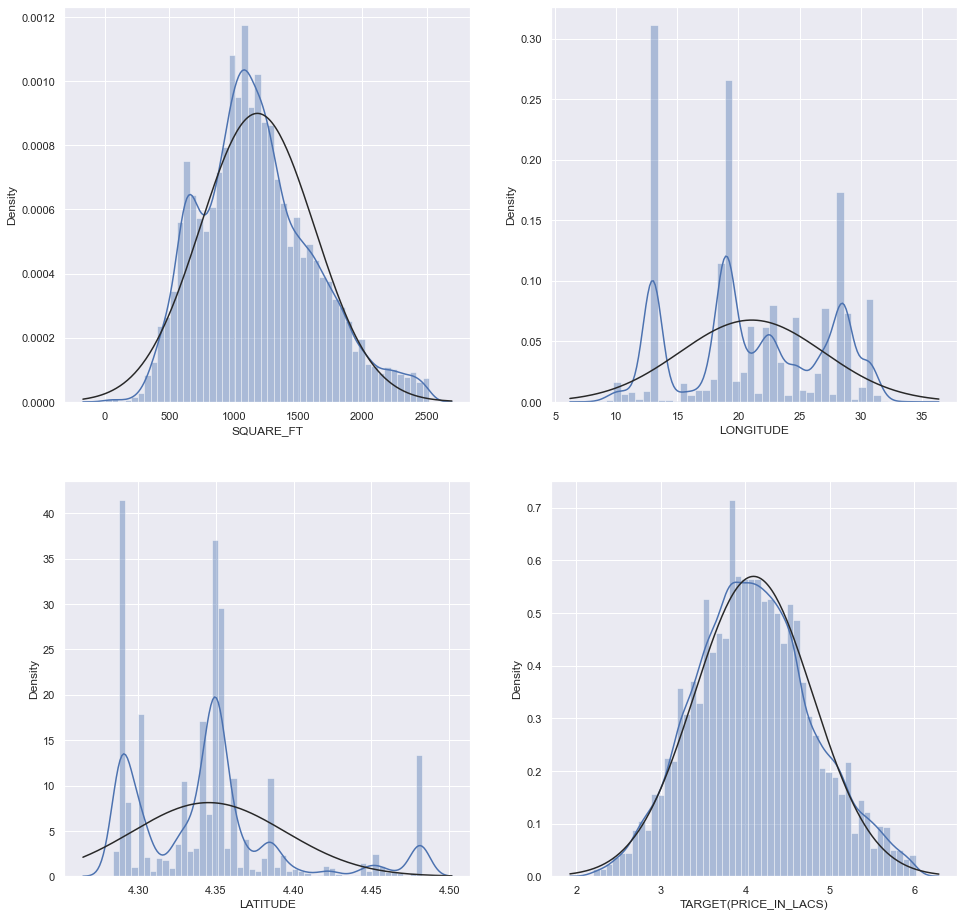

In [75]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(2,2)

sns.distplot(d4['SQUARE_FT'],fit=norm,ax=ax[0,0])
sns.distplot(d4['LONGITUDE'],fit=norm,ax=ax[0,1])
sns.distplot(d4['LATITUDE'],fit=norm,ax=ax[1,0])
sns.distplot(d4['TARGET(PRICE_IN_LACS)'],fit=norm,ax=ax[1,1])


G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  

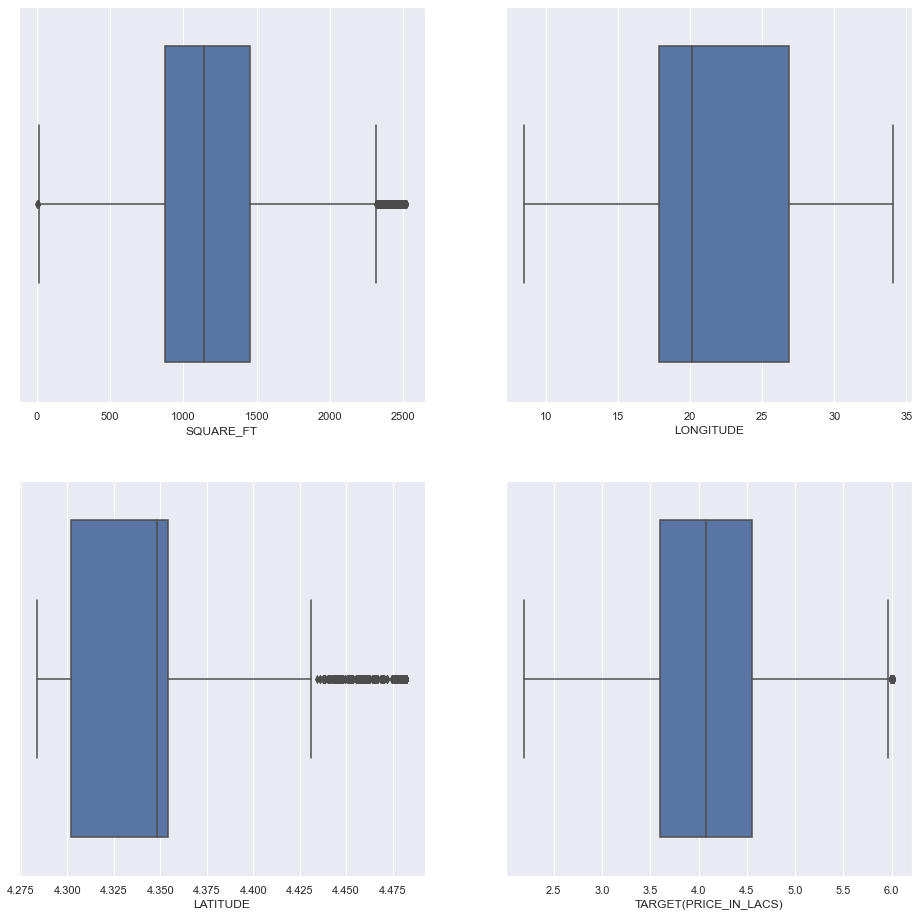

In [76]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(2,2)

sns.boxplot(d4['SQUARE_FT'],ax=ax[0,0],orient='v')
sns.boxplot(d4['LONGITUDE'],ax=ax[0,1],orient='v')
sns.boxplot(d4['LATITUDE'],ax=ax[1,0],orient='v')
sns.boxplot(d4['TARGET(PRICE_IN_LACS)'],ax=ax[1,1],orient='v')


In [77]:
data.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [78]:
d4.to_csv('Univariate-Train-19-10-final.csv',index=False)

In [79]:
d4.shape[0]*100/df.shape[0]

88.53349631591458

## Test File Analysis

* Take log of Sq_ft and Latitude

In [83]:
test = pd.read_csv('./Test.csv')

In [84]:
test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [85]:
test.loc[:,['LATITUDE']] = np.log(test[['LATITUDE']])


G:\Installed\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [86]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,4.291113
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,4.292489
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,4.482832
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,4.325253
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,4.288677


In [87]:
test.to_csv('Univariate-Test-19-10-Final.csv')

## Auto EDA

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv('./Univariate-Test.csv')

In [ ]:
profile = ProfileReport(test)

In [ ]:
profile.to_file('./Pandas Profiling/test.html')
profile.to_widgets()

#### Latitude has 0.3 % missing values in Test Data
    * Possible Measures:
    * Take median
    * Take median after clustering on Latitude and Longitude
    * Take value of corresponding state

In [ ]:
import sweetviz as sv

In [ ]:
train = pd.read_csv('./Univariate-Train.csv')

In [ ]:
advert_report = sv.compare([test,"Test Data"],[train,"Train Data"])
advert_report.show_html('./Pandas Profiling/Train_Test_Report.html')